<a href="https://colab.research.google.com/github/Akash7180/Spam-mail-classification/blob/main/spam_mail_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [ ]:
import numpy as np  #used to create array
import pandas as pd #used to create dataframes
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #text data to numberical values(feature vector)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #used to eveluate the model

data collection and pre-processing


In [ ]:
#loading the data from csv file to a pandas DataFrame
raw_mail_data = pd.read_csv('/mail_data (1).csv')

In [ ]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# replacing the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
#printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#exploring the dataset
raw_mail_data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

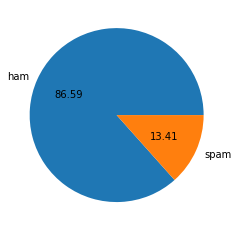

In [ ]:
plt.pie(raw_mail_data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#checking the number of rows and columns in the dataframw
mail_data.shape

(5572, 2)

Label Encoding

In [ ]:
#label spam mail as 0; ham mail as 1;
mail_data.loc[mail_data['Category']== 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category']== 'ham', 'Category',] = 1

In [ ]:
#seperating the data as text and label

X = mail_data['Message']

Y = mail_data['Category']



In [ ]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


data visualization

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# num of words
mail_data['num_words'] = mail_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
mail_data.head()

,Category,Message,num_words
0,1,"Go until jurong point, crazy.. Available only ...",24
1,1,Ok lar... Joking wif u oni...,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,1,U dun say so early hor... U c already then say...,13
4,1,"Nah I don't think he goes to usf, he lives aro...",15


In [ ]:
mail_data['num_characters'] = mail_data['Message'].apply(len)


In [ ]:
mail_data.head()

,Category,Message,num_words,num_sentences,num_characters
0,1,"Go until jurong point, crazy.. Available only ...",24,2,111
1,1,Ok lar... Joking wif u oni...,8,2,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,1,U dun say so early hor... U c already then say...,13,1,49
4,1,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [ ]:
mail_data['num_sentences'] = mail_data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
mail_data.head()

,Category,Message,num_words,num_sentences
0,1,"Go until jurong point, crazy.. Available only ...",24,2
1,1,Ok lar... Joking wif u oni...,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,1,U dun say so early hor... U c already then say...,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",15,1


In [ ]:
mail_data[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.823223,1.977207
std,59.926946,13.854300,1.422573
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# ham
mail_data[mail_data['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,137.989290,27.878179,3.025435
std,29.980287,7.036282,1.543175
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [ ]:
# apam
mail_data[mail_data['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.421347,1.814922
std,58.434864,14.118974,1.331289
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
import seaborn as sns


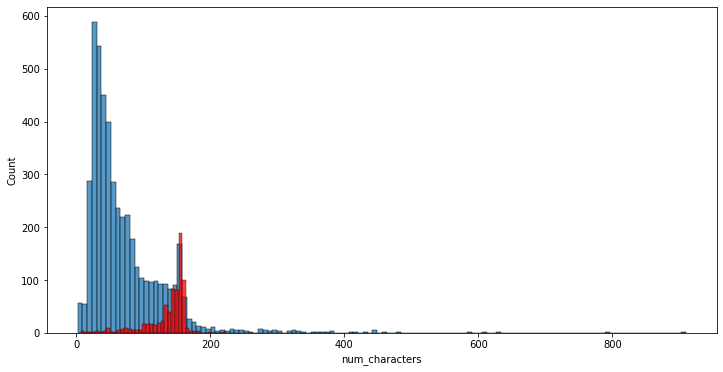

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(mail_data[mail_data['Category'] == 1]['num_characters'])
sns.histplot(mail_data[mail_data['Category'] == 0]['num_characters'],color='red')

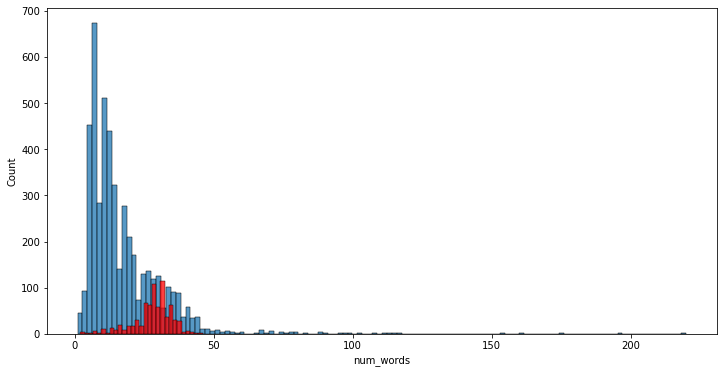

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(mail_data[mail_data['Category'] == 1]['num_words'])
sns.histplot(mail_data[mail_data['Category'] == 0]['num_words'],color='red')

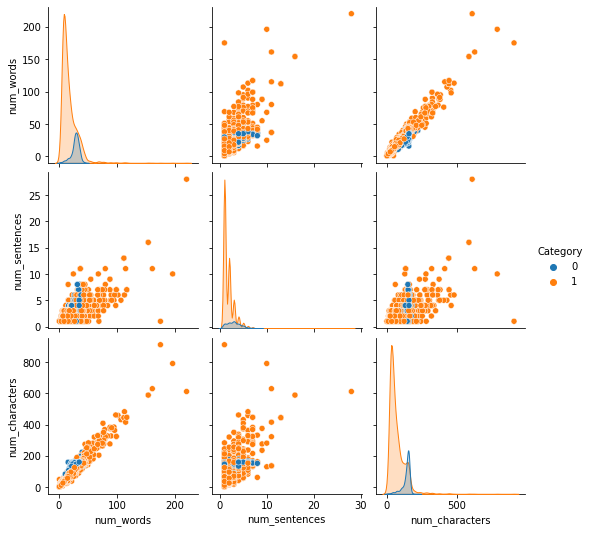

In [ ]:
sns.pairplot(mail_data,hue='Category')


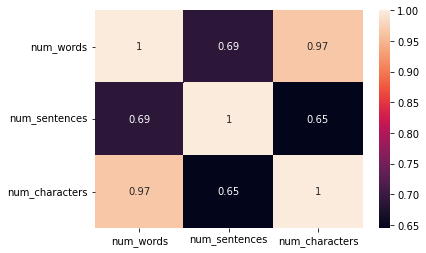

In [ ]:
sns.heatmap(mail_data.corr(),annot=True)

Splitting the data into training data and testing data


In [ ]:
X_train, X_test ,Y_train , Y_test = train_test_split(X,Y,test_size=0.3, random_state=3)#30% of the data is the testing data

In [ ]:
print(X.shape)
print(X_train.shape)

(5572,)
(3900,)


feature extraction

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic Regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase = 'True')

X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train_feature)
#converted text data into numerical values

  (0, 3651)	0.3587221851838313
  (0, 3086)	0.2739938546908377
  (0, 2825)	0.27449571589502497
  (0, 5509)	0.40335109063478575
  (0, 1799)	0.3212783541487352
  (0, 2489)	0.5022955611445961
  (0, 1965)	0.45020567466160955
  (1, 4242)	0.25454751074340237
  (1, 4277)	0.33272056276910283
  (1, 3821)	0.2433861866561607
  (1, 6813)	0.2600994552195357
  (1, 6)	0.33272056276910283
  (1, 6147)	0.16521313463046028
  (1, 2058)	0.18864352312402063
  (1, 3671)	0.16295245094503386
  (1, 1153)	0.31698956000242107
  (1, 3875)	0.19423188001633226
  (1, 3534)	0.33272056276910283
  (1, 3451)	0.1449316171395763
  (1, 4271)	0.19008955732757765
  (1, 6331)	0.33272056276910283
  (1, 3003)	0.2841165834640824
  (2, 5099)	0.30299688346739717
  (2, 6545)	0.19459812997829923
  (2, 4225)	0.30299688346739717
  :	:
  (3897, 2908)	0.32603177409174644
  (3897, 4271)	0.2690692327260679
  (3898, 2081)	0.3654387356575668
  (3898, 3632)	0.3140198944936123
  (3898, 6590)	0.3055286729595858
  (3898, 3587)	0.3117604480135819


Training the Model

In [ ]:
model = LogisticRegression()

In [ ]:
#training the Logistic Regression model with the training data
model.fit(X_train_feature,Y_train)

LogisticRegression()

Evaluating the trained model

In [ ]:
# Prediction on training data

prediction_on_training_data = model.predict(X_train_feature)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ' , accuracy_on_training_data)

Accuracy on training data :  0.9661538461538461


Build a Predictive System

In [ ]:
input_mail = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

#convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

#making predication

prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail


from the result we know that 1 represent ham mail and 0 represents spam mail therefore the prediction is correct